Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [2]:
## usecol and parse the date col
useCols = ['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
data = pd.read_csv('data_stocks.csv')

In [3]:
data['DATE'] = pd.to_datetime(data['DATE'],unit='s',infer_datetime_format=True)

In [4]:
data = data.set_index('DATE')[useCols]

In [5]:
data.head(100)

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000
...,...,...,...,...,...
2017-04-03 15:05:00,143.5700,101.4500,80.32,33.5700,33.4700
2017-04-03 15:06:00,143.5300,101.3600,80.29,33.5450,33.4400
2017-04-03 15:07:00,143.3400,101.2500,80.12,33.4900,33.4100


In [6]:
## change the frequency of datetime from per min to per day ,replace the value with mean of price in day 
from datetime import timedelta
df = pd.DataFrame(pd.date_range('2017-04-03','2017-08-31',freq='B'),columns=['DATE'])
for col in data.columns:
    df[col] = [data[col][date:date+timedelta(days= 1)].mean() for date in df['DATE']]

In [7]:
df.isnull().sum()

DATE           0
NASDAQ.AAPL    3
NASDAQ.ADP     3
NASDAQ.CBOE    3
NASDAQ.CSCO    3
NASDAQ.EBAY    3
dtype: int64

In [8]:
df.fillna(method='ffill',inplace=True)

In [9]:
df.set_index('DATE',inplace=True)

In [10]:
## checking stationary 
def check_stationary(ts):
    plt.figure(figsize = (10,4))
    plt.plot(ts)
    for month in range(ts.index[0].month,ts.index[-1].month+1):
        plt.axvline(pd.to_datetime(f'2017-0{month}-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(ts.mean(), color='r', alpha=0.2, linestyle='--')

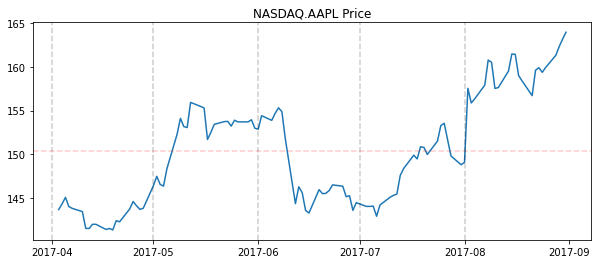

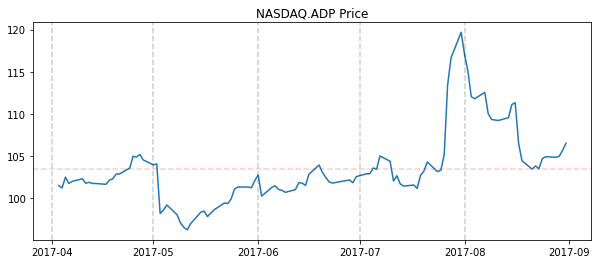

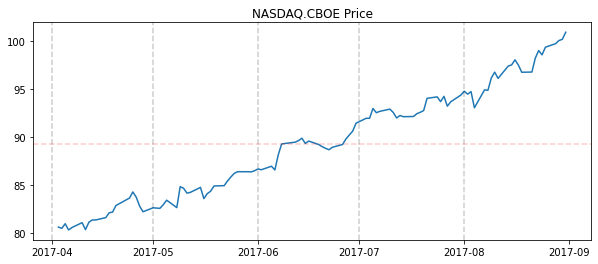

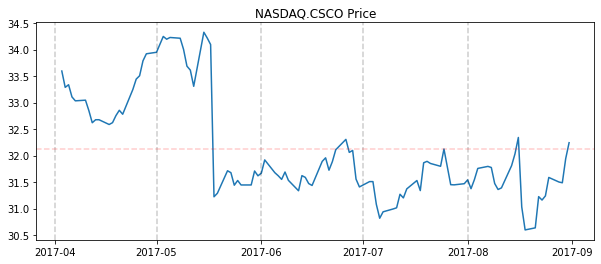

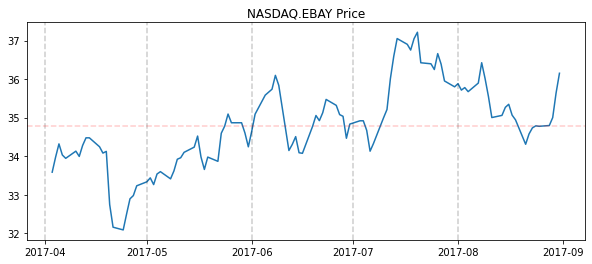

In [11]:
for col in df.columns: 
    check_stationary(df[col])
    plt.title(f'{col} Price')
## not stationary

In [12]:
## do some tranfomation -- change the price into return 
newdf = df.pct_change().dropna()
newdf = newdf.asfreq('B')
newdf.index

DatetimeIndex(['2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07',
               '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13',
               '2017-04-14', '2017-04-17',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='DATE', length=108, freq='B')

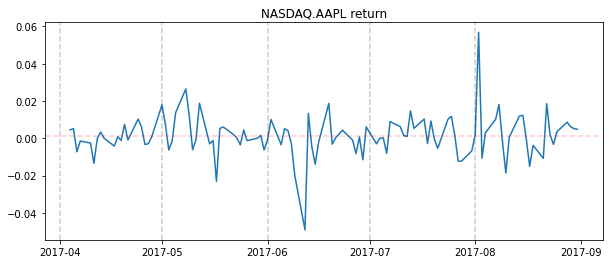

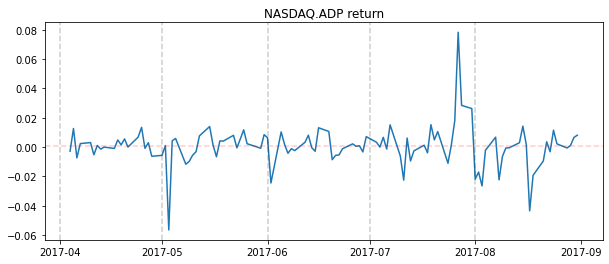

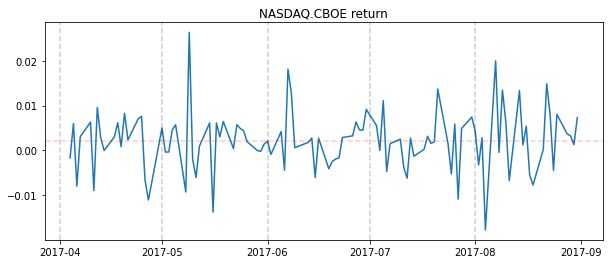

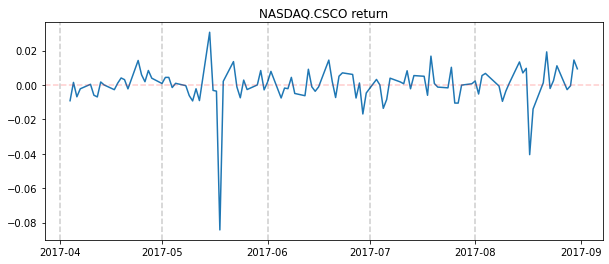

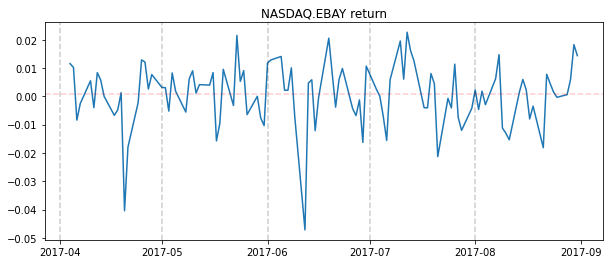

In [13]:
for col in df.columns: 
    check_stationary(newdf[col])
    plt.title(f'{col} return')
## now with some changing variace and fixed mean 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


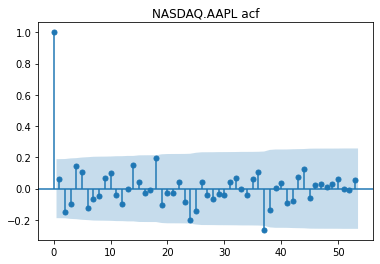

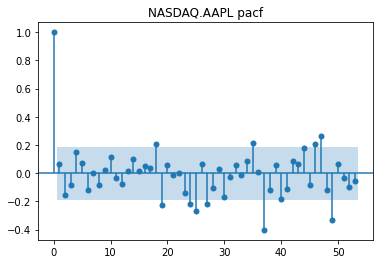

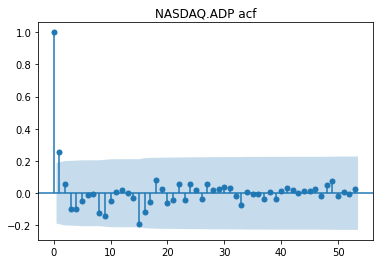

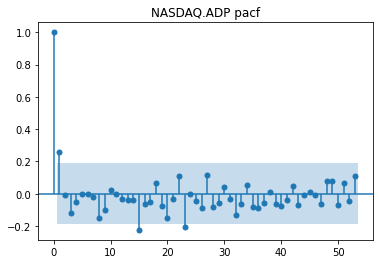

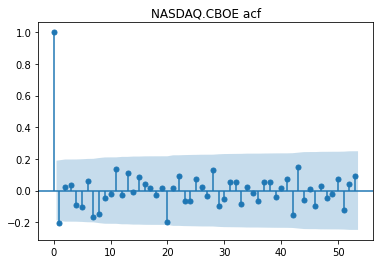

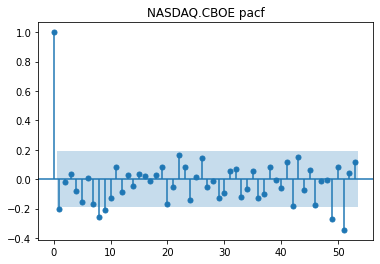

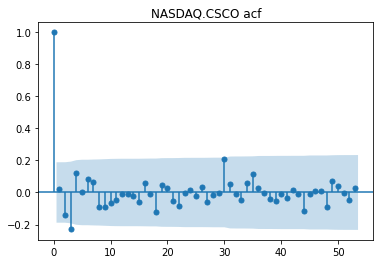

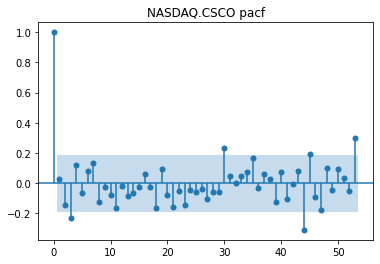

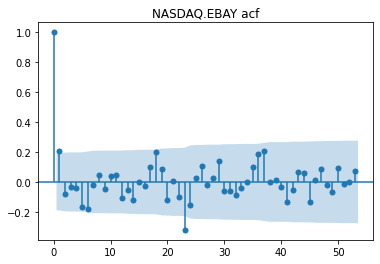

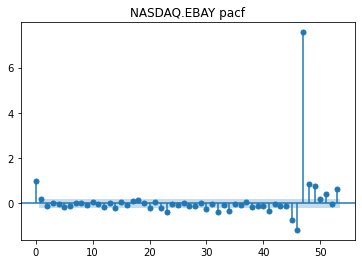

In [14]:
## ploting acf and pacf graph 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for col in newdf.columns:
    fig1 = plot_acf(newdf[col],lags=53)
    plt.title(f'{col} acf')
    fig2 = plot_pacf(newdf[col],lags=53)
    plt.title(f'{col} pacf')

In [15]:
## subset the data --  rest vs last month data 
start_test = pd.to_datetime('2017-08-01')
end_test = pd.to_datetime('2017-08-31')
trainData = newdf[newdf.index < start_test]
testData = newdf[newdf.index >= start_test]
trainData

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-04,0.004566,-0.002835,-0.001667,-0.009169,0.011560
2017-04-05,0.005145,0.012666,0.005992,0.001477,0.010205
2017-04-06,-0.007213,-0.007325,-0.007972,-0.006887,-0.008405
2017-04-07,-0.001478,0.002384,0.003079,-0.002236,-0.002543
2017-04-10,-0.002546,0.003089,0.006314,0.000381,0.005489
...,...,...,...,...,...
2017-07-25,0.011770,0.001582,-0.005256,0.010259,-0.004092
2017-07-26,0.001691,0.018052,0.005877,-0.010526,0.011383
2017-07-27,-0.012268,0.078348,-0.010867,-0.010547,-0.007410


In [16]:
## model buidling 
modelAAPL = ARIMA(trainData['NASDAQ.AAPL'],order=(0,0,0),seasonal_order =(1,0,0,37),trend='n')
resAAPL = modelAAPL.fit()
resAAPL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NASDAQ.AAPL   No. Observations:                   85
Model:             ARIMA(1, 0, 0, 37)   Log Likelihood                 272.653
Date:                Wed, 14 Jul 2021   AIC                           -541.306
Time:                        16:00:40   BIC                           -536.421
Sample:                    04-04-2017   HQIC                          -539.341
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L37      -0.2280      0.261     -0.873      0.383      -0.740       0.284
sigma2       9.35e-05   1.09e-05      8.616      0.000    7.22e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):               162.27
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -1.27
Prob(H) (two-sided):                  0.50   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
modelADP = ARIMA(trainData['NASDAQ.ADP'],order=(1,0,0),seasonal_order =(0,0,0,0),trend='n')
resADP = modelADP.fit()
resADP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             NASDAQ.ADP   No. Observations:                   85
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 247.929
Date:                Wed, 14 Jul 2021   AIC                           -491.859
Time:                        16:00:40   BIC                           -486.973
Sample:                    04-04-2017   HQIC                          -489.894
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2641      0.100      2.647      0.008       0.069       0.460
sigma2         0.0002    1.1e-05     15.507      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               658.92
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             0.85
Prob(H) (two-sided):                  0.15   Kurtosis:                        16.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
#modelCBOE = ARIMA(trainData['NASDAQ.CBOE'],order=(0,0,0),seasonal_order =(0,0,0,0),trend='n')
#res = modelCBOE.fit()
#res.summary()
## no suitable value to predic

In [19]:
modelCSCO = ARIMA(trainData['NASDAQ.CSCO'],order=(0,0,0),seasonal_order =(1,0,0,3),trend='n')
resCSCO = modelCSCO.fit()
resCSCO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NASDAQ.CSCO   No. Observations:                   85
Model:              ARIMA(1, 0, 0, 3)   Log Likelihood                 259.901
Date:                Wed, 14 Jul 2021   AIC                           -515.801
Time:                        16:00:40   BIC                           -510.916
Sample:                    04-04-2017   HQIC                          -513.836
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L3       -0.1787      0.087     -2.051      0.040      -0.350      -0.008
sigma2         0.0001   1.02e-05     12.666      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2262.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -3.53
Prob(H) (two-sided):                  0.12   Kurtosis:                        27.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
modelEBAY = ARIMA(trainData['NASDAQ.EBAY'],order=(0,0,0),seasonal_order =(1,0,0,23),trend='n')
resEBAY = modelEBAY.fit()
resEBAY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NASDAQ.EBAY   No. Observations:                   85
Model:             ARIMA(1, 0, 0, 23)   Log Likelihood                 263.409
Date:                Wed, 14 Jul 2021   AIC                           -522.818
Time:                        16:00:41   BIC                           -517.933
Sample:                    04-04-2017   HQIC                          -520.853
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L23      -0.3699      0.142     -2.602      0.009      -0.649      -0.091
sigma2         0.0001   1.36e-05      8.426      0.000    8.78e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.83   Jarque-Bera (JB):                79.12
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -1.39
Prob(H) (two-sided):                  0.68   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
## get pred result and evaluate model
from sklearn.metrics import mean_squared_error

def evaluateTS(col,res = None, pred = None):
    if pred is None and res is None :
        return 'No valid data'
    if res:
        pred = res.predict(start = start_test, end = end_test)
    error = testData[col] - pred

    plt.figure(figsize=(10,4))
    plt.plot(error)
    plt.title('Residuals from ARIMA Model', fontsize=20)
    plt.ylabel('Error', fontsize=16)
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)

    plt.figure(figsize=(10,4))
    plt.plot(testData[col])
    plt.plot(pred)
    plt.legend(('Data', 'Predictions'), fontsize=16)
    plt.ylabel('return', fontsize=16)

    print(np.sqrt(mean_squared_error(testData[col] , pred)))

0.013710622520649623


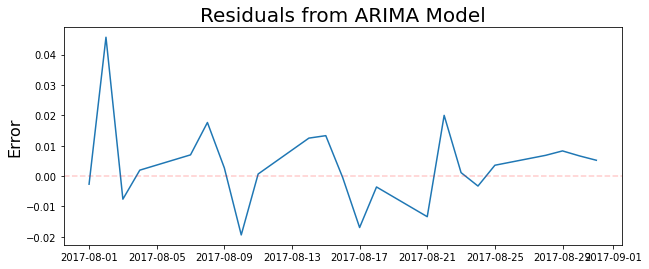

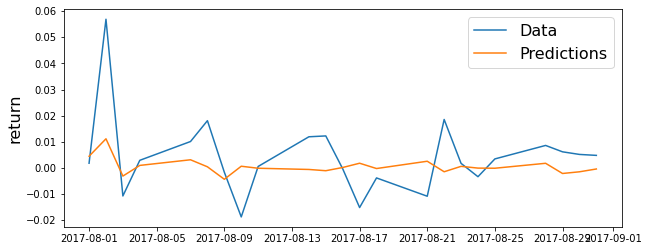

In [24]:
evaluateTS('NASDAQ.AAPL',resAAPL)

0.015241587972846655


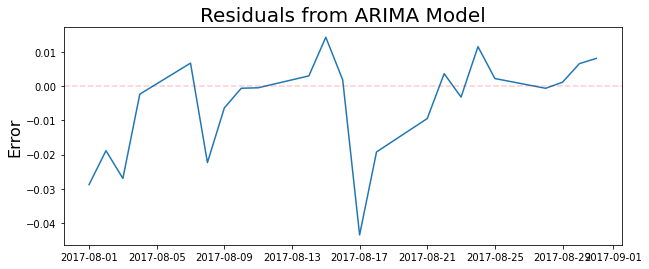

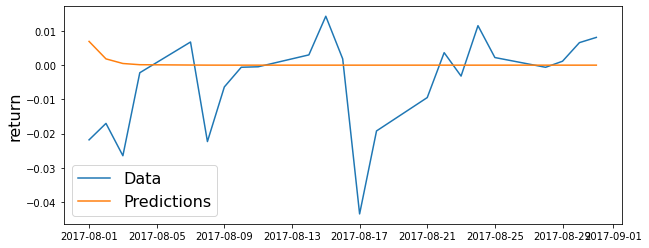

In [25]:
evaluateTS('NASDAQ.ADP',resADP)

0.011766580748066387


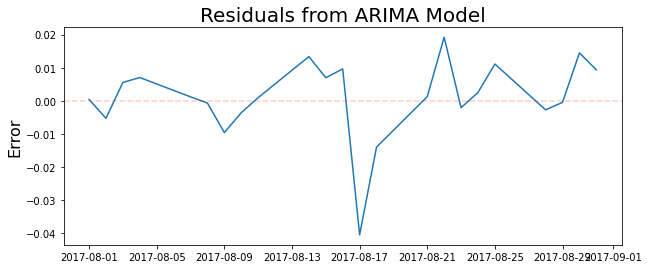

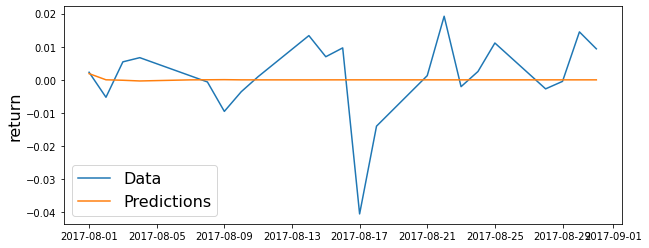

In [26]:
evaluateTS('NASDAQ.CSCO',resCSCO)

0.008180882701650526


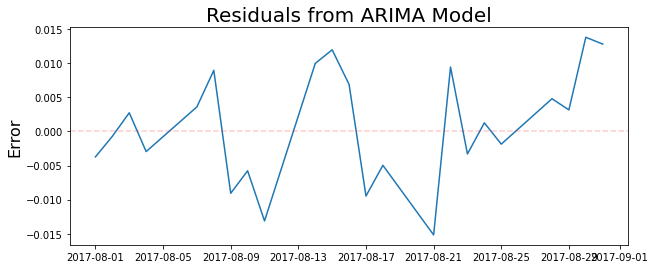

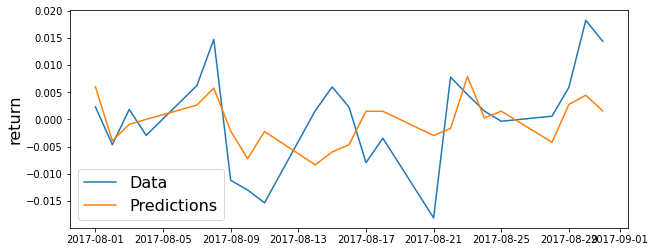

In [27]:
evaluateTS('NASDAQ.EBAY',resEBAY)